# Import package and load dataset

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
!ls

ingredients.csv             recipes.csv
recette_data_analysis.ipynb


In [41]:
ingredients=pd.read_csv("ingredients.csv")
recipes=pd.read_csv("recipes.csv")

In [42]:
pd.set_option("max_rows", 20)
pd.set_option("max_colwidth", 50)

# Display raw data recipes and ingredients dataframes

## Ingredients

In [43]:
ingredients

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578325,532201,2 plaques de saumon fumé
578326,532201,25 g de beurre
578327,532201,4 citrons verts
578328,532201,4 oeufs


## Recipes

In [44]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...
...,...,...,...,...,...
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...
70601,532213,https://www.marmiton.org/recettes/recette_grat...,Gratin pomme de terre et panais,Accompagnement,Éplucher les pommes de terre et le panais et l...


# Exploration of recipes

In [45]:
def fastcheck(data):
    print('Data shape:\n',data.shape,\
          '\n\nColumns name:\n',list(data.columns),\
          '\n\nDatas type:\n',data.dtypes,'\n\nNull data:\n',\
          data.isnull().sum().sort_values(ascending=False)/len(data)*100)
    if data.duplicated().sum() > 0:
        print(f'\n\n{data.duplicated().sum()} duplicated data',\
              '\n\nDuplicated data:\n',data.duplicated())
        print('\n\nDrop duplicates ? (y/n)')
        ans = input()
        if ans.lower() == 'y':
            data = data.drop_duplicates()
            print('\nNew data shape:\n',data.shape)
    else:
        print('No duplicate')
    data.sample(10)
    return data

## Check recipes  : 70 603 rows with 18 duplicates (<0,03%)  and 0 null

In [46]:
recipes=fastcheck(recipes)

Data shape:
 (70603, 5) 

Columns name:
 ['recipe_id', 'recipe_url', 'recipe_title', 'recipe_type', 'recipe_steps'] 

Datas type:
 recipe_id        int64
recipe_url      object
recipe_title    object
recipe_type     object
recipe_steps    object
dtype: object 

Null data:
 recipe_id       0.0
recipe_url      0.0
recipe_title    0.0
recipe_type     0.0
recipe_steps    0.0
dtype: float64


18 duplicated data 

Duplicated data:
 0        False
1        False
2        False
3        False
4        False
         ...  
70598    False
70599    False
70600    False
70601    False
70602     True
Length: 70603, dtype: bool


Drop duplicates ? (y/n)
y

New data shape:
 (70585, 5)


## Check recipe_steps (=instructions) format

### Add number of sentences in recipes in new column

In [47]:
enriched_recipes=recipes.copy()
#Count the number of sentences using punctuation "." and store it in field nb_sentences
#Warning : assumes that each sentence ends with "." (! or no punctuation is not counted)
enriched_recipes["nb_sentences"]=enriched_recipes["recipe_steps"].apply(lambda x: x.count("."))


In [48]:
enriched_recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7
...,...,...,...,...,...,...
70597,532440,https://www.marmiton.org/recettes/recette_ciga...,Cigare au poulet et au chèvre,Plat principal,Dénerver et couper le poulet en fines lamelles...,5
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...,14
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...,15
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...,11


### Median of 8 sentences by instruction (based on "." occurence)

nb_sentences    8.0
dtype: float64

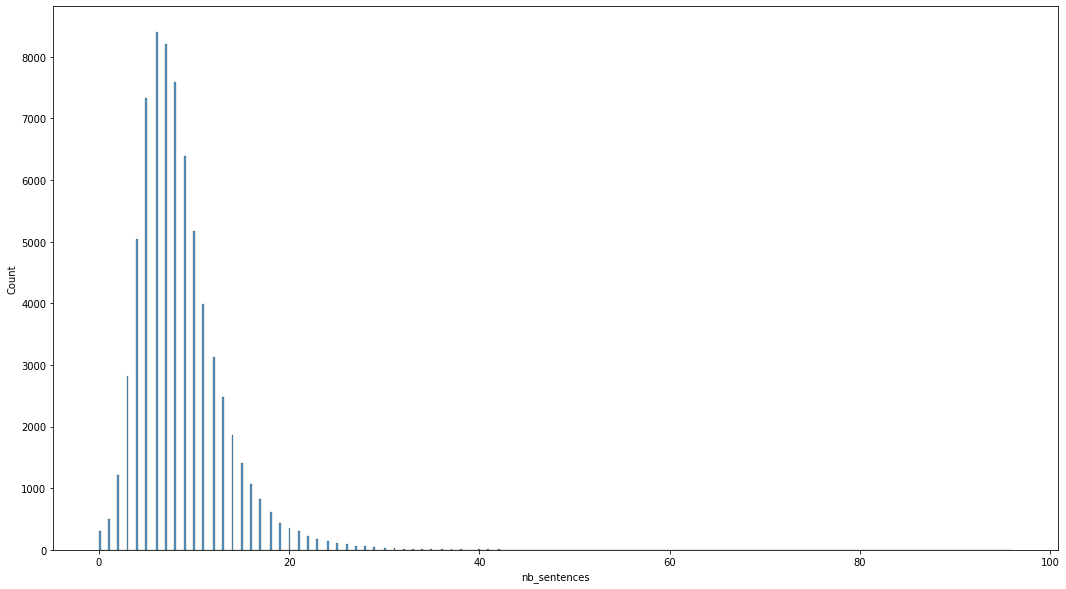

In [49]:
plt.figure(figsize=(18, 10))
sns.histplot(enriched_recipes['nb_sentences'])#, kde=True);
enriched_recipes[['nb_sentences']].median()

In [56]:
enriched_recipes.query("nb_sentences < 3")

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
21,10570,https://www.marmiton.org/recettes/recette_omel...,Omelette à la tapenade,Plat principal,"Cassez les œufs et battez-les, mettez une ou d...",2
30,10554,https://www.marmiton.org/recettes/recette_pomm...,Pomme d'amour,Pomme d'amour,"Faire un caramel dans une casserole, pendant c...",2
60,10597,https://www.marmiton.org/recettes/recette_papi...,Papillote de poulet au bacon,Plat principal,Préparez par personne une papillote (papier al...,2
61,10595,https://www.marmiton.org/recettes/recette_pain...,Pain d'œufs au caramel de l'abbaye de Château-...,Dessert,Faire bouillir un demi litre de lait avec un p...,2
...,...,...,...,...,...,...
70555,532039,https://www.marmiton.org/recettes/recette_bol-...,"Bol de yaourt, bananes et pommes à partager (s...",Dessert,Verse les yaourts dans un grand saladier et aj...,1
70556,532038,https://www.marmiton.org/recettes/recette_verr...,Verrine super simple à la pomme et au spéculoos,Dessert,Commence par écraser les spéculoos. Mets dans ...,1
70562,531991,https://www.marmiton.org/recettes/recette_cock...,Cocktail spécial Halloween,Boissons,Verse 4 ml de sirop de menthe dans un grand ve...,2
70563,531968,https://www.marmiton.org/recettes/recette_les-...,Les sucettes fantômes,Confiserie,"Pour chaque sucettes, mets un demi-mouchoir au...",0


In [69]:
list(enriched_recipes.query("recipe_id==532038").iloc[:,4])

['Commence par écraser les spéculoos. Mets dans des verrines un peu de compote, puis par-dessus les spéculoos écrasés, et enfin la chantilly !!!']

### Random check of instructions format

In [50]:
recipes_sample=recipes.sample(500)
for i in range(10):
    print(f"\n---> RECETTE : {recipes_sample.iloc[i,2]} :\n")
    print(f"{recipes_sample.iloc[i,4].count('.')} phrases"
         )

    print(recipes_sample.iloc[i,4])


---> RECETTE : Crème de banane au Cooking Chef :

5 phrases
Épluchez, puis coupez les bananes en petits morceaux. Déposez-les dans la cuve de votre Cooking Chef. Arrosez de jus de citron, ajoutez le reste des ingrédients, puis mixez avec le blender sur la sortie ultra rapide / 30 sec / 0 °C /  vit. 1 à max.  

 Dégustez immédiatement ou placez au frais pendant 15 minutes maximum.

---> RECETTE : Gâteau à la crème de citron et petits beurre :

7 phrases
Préchauffer le four à 150°C (Thermostat 5). 

 Placer la crème liquide au congélateur. 

 Ecraser les gâteaux avec un rouleau (dans un sac plastique), faire fondre le beurre et mélanger avec les biscuits dans le fond du plat, placer au four 8 min. 

 Sortir et laisser refroidir le plat. 

 Presser le jus de citron, mettre les zestes et le lait concentré sucré et mélanger doucement.  

 Battre la crème au batteur, ajouter doucement le mélange citron/zestes/lait. 

 Mettre la crème sur les biscuits et placer le moule au frigo.

---> RECET

### Check recipe_type

In [51]:
#It is expected 9 recipe_type, but we have 25155 !!
print(recipes.recipe_type.nunique())

25155


(38291, 5)
(70585, 5)


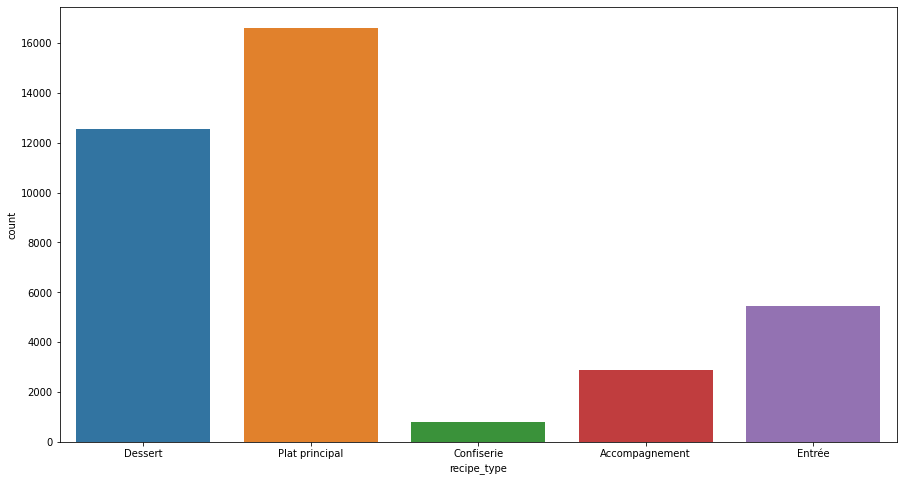

In [52]:
known_types=["Entrée", "Plat principal", "Dessert", "Amuse-gueule", "Accompagnement", "Sauce", "Boisson", "Confiserie", "Conseil"]
mask = recipes['recipe_type'].isin(known_types)
recipes[mask]

plt.figure(figsize=(15,8))
sns.countplot(x="recipe_type", data=recipes[mask])

# En dropant tous les types non-connus on réduit le dataset presque de moitié : 70 585 -> 38 291

print(recipes[mask].shape)
print(recipes.shape)


# Exploration of ingredients

## Check ingredients : 578 330 rows with 2 694 duplicates (<0,5%) and 0 null

In [53]:
ingredients=fastcheck(ingredients)

Data shape:
 (578330, 2) 

Columns name:
 ['recipe_id', 'ingredient'] 

Datas type:
 recipe_id      int64
ingredient    object
dtype: object 

Null data:
 recipe_id     0.0
ingredient    0.0
dtype: float64


2694 duplicated data 

Duplicated data:
 0         False
1         False
2         False
3         False
4         False
          ...  
578325     True
578326     True
578327     True
578328     True
578329     True
Length: 578330, dtype: bool


Drop duplicates ? (y/n)
y

New data shape:
 (575636, 2)


# TODO analyse des données (pourcentage sucré et salé, nombre d'ingrédients, taille moyenne recette, recette 1 seul ingrédient, recette pas d'ingrédient), enlever les instructions inférieurs à 1 phrase (ou un mot, ou autre critere)